In [2]:
library(ggplot2)
library(lubridate)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  2.1.1       ✔ purrr   0.3.2  
✔ tidyr   0.8.3       ✔ dplyr   0.8.0.1
✔ readr   1.3.1       ✔ stringr 1.4.0  
✔ tibble  2.1.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ lubridate::date()        masks base::date()
✖ dplyr::filter()          masks stats::filter()
✖ lubridate::intersect()   masks base::intersect()
✖ dplyr::lag()             masks stats::lag()
✖ lubridate::setdiff()     masks base::setdiff()
✖ lubridate::union()       masks base::union()


In [3]:
list.files(path = "../input")

character(0)

In [4]:
ground_data <- read.csv('Ground_Averages.csv')
odi_scores <- read.csv('ODI_Match_Totals.csv')
players <- read.csv('WC_players.csv')

In [5]:
head(players,n=10)

Player,ID,Country
<fct>,<int>,<fct>
Gulbadin Naib (c),352048,Afghanistan
Rashid Khan (vc),793463,Afghanistan
Aftab Alam,440963,Afghanistan
Asghar Afghan,320652,Afghanistan
Dawlat Zadran,516561,Afghanistan
Hamid Hassan,311427,Afghanistan
Hashmatullah Shahidi,440970,Afghanistan
Hazratullah Zazai,793457,Afghanistan
Mohammad Nabi,25913,Afghanistan


In [6]:
players <- players %>% 
    mutate(PlayerName = Player, Player = str_replace(Player, '(\\(.*)', "") %>% str_trim())

In [7]:
head(ground_data,n=10)

Ground,Span,Mat,Won,Tied,NR,Runs,Wkts,Balls,Ave,RPO
<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
"Eden Gardens, Kolkata - India",2013-2017,4,4,0,0,2161,72,2297,30.01,5.64
"Feroz Shah Kotla, Delhi - India",2013-2019,4,4,0,0,1789,75,2331,23.85,4.60
Melbourne Cricket Ground - Australia,2013-2019,15,15,0,0,7656,217,8482,35.28,5.41
"Saurashtra Cricket Association Stadium, Rajkot - India",2013-2015,2,2,0,0,1163,26,1200,44.73,5.81
Adelaide Oval - Australia,2013-2019,10,10,0,0,4863,157,5645,30.97,5.16
"Nehru Stadium, Kochi - India",2013-2014,3,3,0,0,1384,46,1567,30.08,5.29
"Brisbane Cricket Ground, Woolloongabba, Brisbane - Australia",2013-2018,8,8,0,0,3671,123,4189,29.84,5.25
"JSCA International Stadium Complex, Ranchi - India",2013-2019,5,4,0,1,2303,68,2522,33.86,5.47
"Boland Park, Paarl - South Africa",2013-2018,3,3,0,0,1478,51,1711,28.98,5.18


In [8]:
eng_grounds <- ground_data %>%
    filter(str_detect(Ground, 'England'))

eng_grounds

Ground,Span,Mat,Won,Tied,NR,Runs,Wkts,Balls,Ave,RPO
<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
"Lord's, London - England",2013-2018,7,7,0,0,3549,110,3851,32.26,5.52
"The Rose Bowl, Southampton - England",2013-2019,8,8,0,0,4766,103,4522,46.27,6.32
"Trent Bridge, Nottingham - England",2013-2019,9,7,1,1,4944,112,4530,44.14,6.54
"Sophia Gardens, Cardiff - England",2013-2018,14,13,1,0,6690,221,7264,30.27,5.52
"Kennington Oval, London - England",2013-2019,17,15,0,2,8038,208,8369,38.64,5.76
"Edgbaston, Birmingham - England",2013-2017,15,12,0,3,5950,182,6654,32.69,5.36
"Old Trafford, Manchester - England",2013-2018,6,6,0,0,2294,87,2627,26.36,5.23
"Riverside Ground, Chester-le-Street - England",2014-2018,3,3,0,0,1454,46,1475,31.60,5.91
"Headingley, Leeds - England",2014-2019,6,5,0,0,3262,83,3351,39.30,5.84


In [9]:
wc_ground_names <- eng_grounds$Ground %>%
    str_remove(' - England') %>%
    str_split(',', simplify=TRUE) %>%   
    as.data.frame(stringsAsFactors = FALSE) %>% 
    rename('Stadium' = 'V1', 'Ground' = 'V2')
wc_ground_names$Ground[wc_ground_names$Stadium == "Lord's"] <- "Lord's"
wc_ground_names$Ground[wc_ground_names$Stadium == "Kennington Oval"] <- "The Oval"

wc_ground_names

Stadium,Ground
<chr>,<chr>
Lord's,Lord's
The Rose Bowl,Southampton
Trent Bridge,Nottingham
Sophia Gardens,Cardiff
Kennington Oval,The Oval
Edgbaston,Birmingham
Old Trafford,Manchester
Riverside Ground,Chester-le-Street
Headingley,Leeds


In [10]:
head(odi_scores,n=10)

X,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start.Date,Match_ID,Country,Country_ID
<int>,<fct>,<dbl>,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
412,250,48.3,5.15,NA,1,won,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
680,165,48.0,3.43,251,2,lost,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6
413,157,48.5,3.21,168,2,lost,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7
681,167,43.4,3.82,NA,1,won,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6
117,198,40.0,4.95,306,2,lost,v Australia,Melbourne,11 Jan 2013,ODI # 3317,SriLanka,8
1076,305/5,50.0,6.10,NA,1,won,v Sri Lanka,Melbourne,11 Jan 2013,ODI # 3317,Australia,2
682,316/9,50.0,6.32,326,2,lost,v England,Rajkot,11 Jan 2013,ODI # 3318,India,6
836,325/4,50.0,6.50,NA,1,won,v India,Rajkot,11 Jan 2013,ODI # 3318,England,1
118,172/2,40.1,4.28,171,2,won,v Australia,Adelaide,13 Jan 2013,ODI # 3319,SriLanka,8


In [11]:
wc_prev_matches <- odi_scores %>%
    filter(Ground != 'East London') %>% 
    filter(str_detect(Ground, paste(str_trim(wc_ground_names$Ground), collapse='|')))

wc_prev_matches$Country <- wc_prev_matches$Country %>% recode('Newzealad' = 'NewZealand')

wc_prev_matches$Score <- wc_prev_matches$Score %>% str_replace('(/.)', '')

head(wc_prev_matches)

X,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start.Date,Match_ID,Country,Country_ID
<int>,<chr>,<dbl>,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
557,231,46.5,4.93,228,2,won,v England,Lord's,31 May 2013,ODI # 3360,NewZealand,5
844,227,50.0,4.54,NA,1,lost,v New Zealand,Lord's,31 May 2013,ODI # 3360,England,1
558,359,50.0,7.18,NA,1,won,v England,Southampton,2 Jun 2013,ODI # 3361,NewZealand,5
845,273,44.1,6.18,360,2,lost,v New Zealand,Southampton,2 Jun 2013,ODI # 3361,England,1
559,253,46.3,5.44,288,2,lost,v England,Nottingham,5 Jun 2013,ODI # 3362,NewZealand,5
846,287,50.0,5.74,NA,1,won,v New Zealand,Nottingham,5 Jun 2013,ODI # 3362,England,1


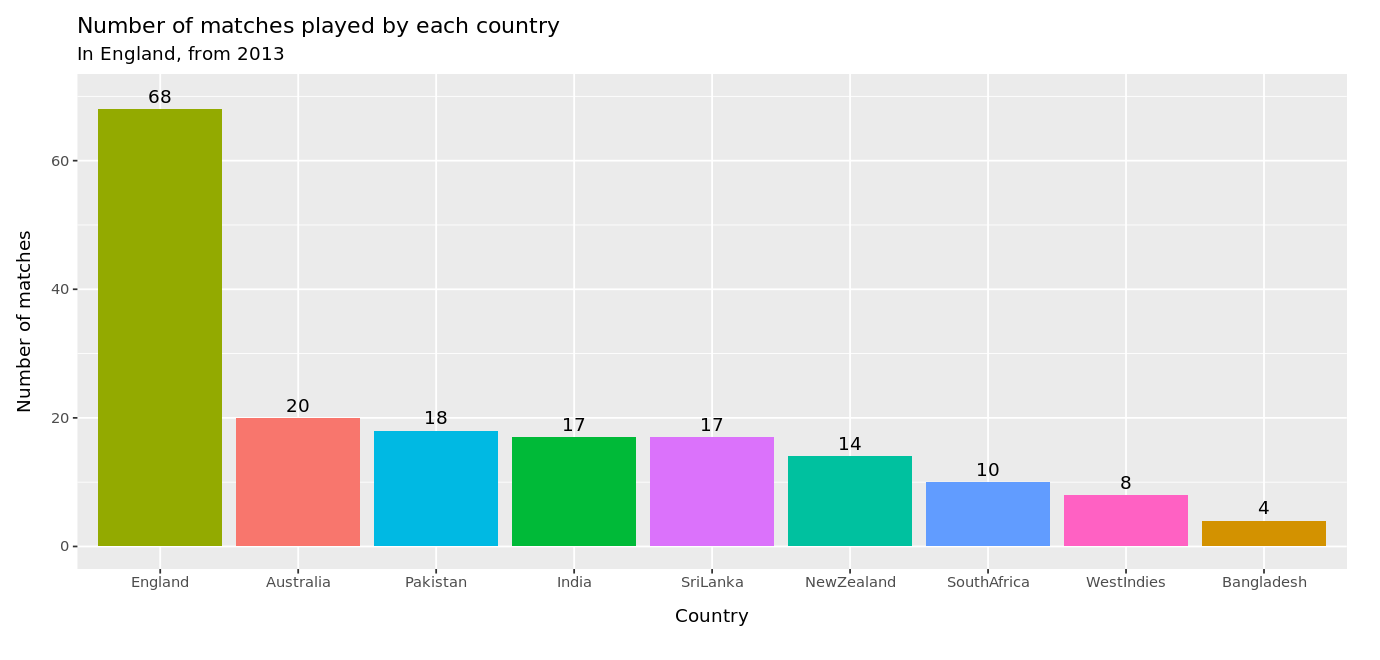

In [13]:
options(repr.plot.width=11.5, repr.plot.height=5.5)
no_of_matches <- wc_prev_matches %>% 
    mutate(Match_ID = str_replace(Match_ID, 'ODI # ', '')) %>% 
    group_by(Country) %>% count(Match_ID) %>% 
    distinct() %>% 
    count(Country)

ggplot(no_of_matches, aes(x=reorder(Country, -n), y=n, fill=Country, label=n)) + 
    geom_bar(stat='identity') +
    labs(x='Country', y='Number of matches', title='Number of matches played by each country', subtitle = 'In England, from 2013') + 
    guides(fill=FALSE) + 
    geom_text(nudge_y = 2) +
    theme(plot.margin = margin(10, 20, 20, 10), axis.title.y = element_text(size=11, margin = margin(0,10,0,0)), axis.title.x = element_text(size=11, margin = margin(10,0,0,0)))

In [14]:
result_by_country <- wc_prev_matches %>% group_by(Country, Result) %>% summarize(n = n()) %>% inner_join(no_of_matches, by = "Country") %>% mutate(perc = n.x/n.y * 100)
result_by_country$Result <- recode(result_by_country$Result, '-'='Unknown', 'lost' = 'Lost', 'n/r' = 'No Result', 'won'='Won', 'tied'='Tie')

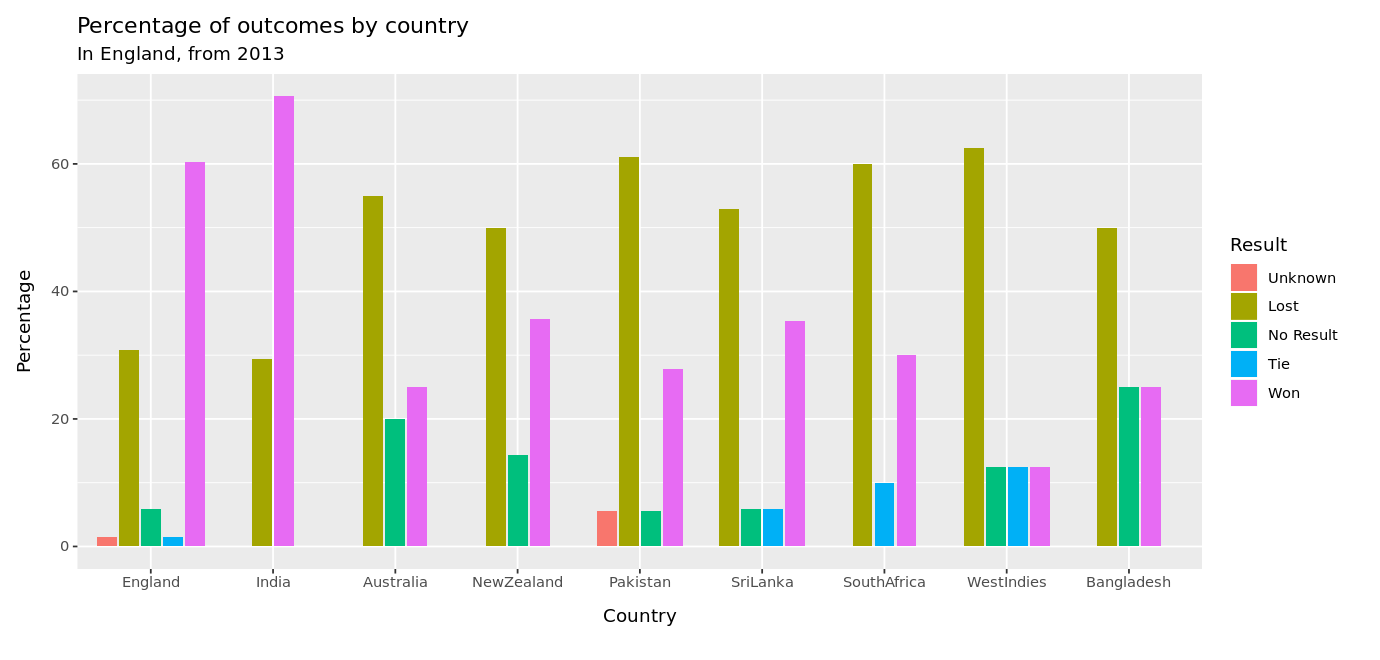

In [16]:
ggplot(result_by_country, aes(x=reorder(Country, -n.x), y=perc, fill=Result)) + 
    geom_bar(stat='identity', position = position_dodge2(width=0.5, preserve = 'single')) +
    labs(x='Country', y='Percentage', title='Percentage of outcomes by country', subtitle = 'In England, from 2013') +
    theme(plot.margin = margin(10, 20, 20, 10), axis.title.y = element_text(size=11, margin = margin(0,10,0,0)), axis.title.x = element_text(size=11, margin = margin(10,0,0,0)))

In [22]:
head_to_head <- function(t1, t2){
    t1_t2 <- wc_prev_matches %>% filter(str_detect(Country, paste(t1, '|', t2, sep='')), str_detect(Opposition,paste(t1, '|', t2, sep=''))) %>% group_by(Result, Country)
    number_matches <- nrow(t1_t2)

ggplot(filter(t1_t2, Result == 'won'), aes(x=Country, fill=Country)) + geom_bar(position='dodge', width = 0.3) + geom_text(stat='count', aes(label=..count..), nudge_y = 0.2) + 
        labs(x='Country', y='Wins', title=paste(t1, 'vs.', t2), subtitle = 'Head-to-head, ODIs since 2013 in England') +
        theme(plot.margin = margin(5, 10, 10, 5), axis.title.y = element_text(size=11, margin = margin(0,10,0,0)), axis.title.x = element_text(size=11, margin = margin(10,0,0,0))) + 
        guides(fill=FALSE)
}

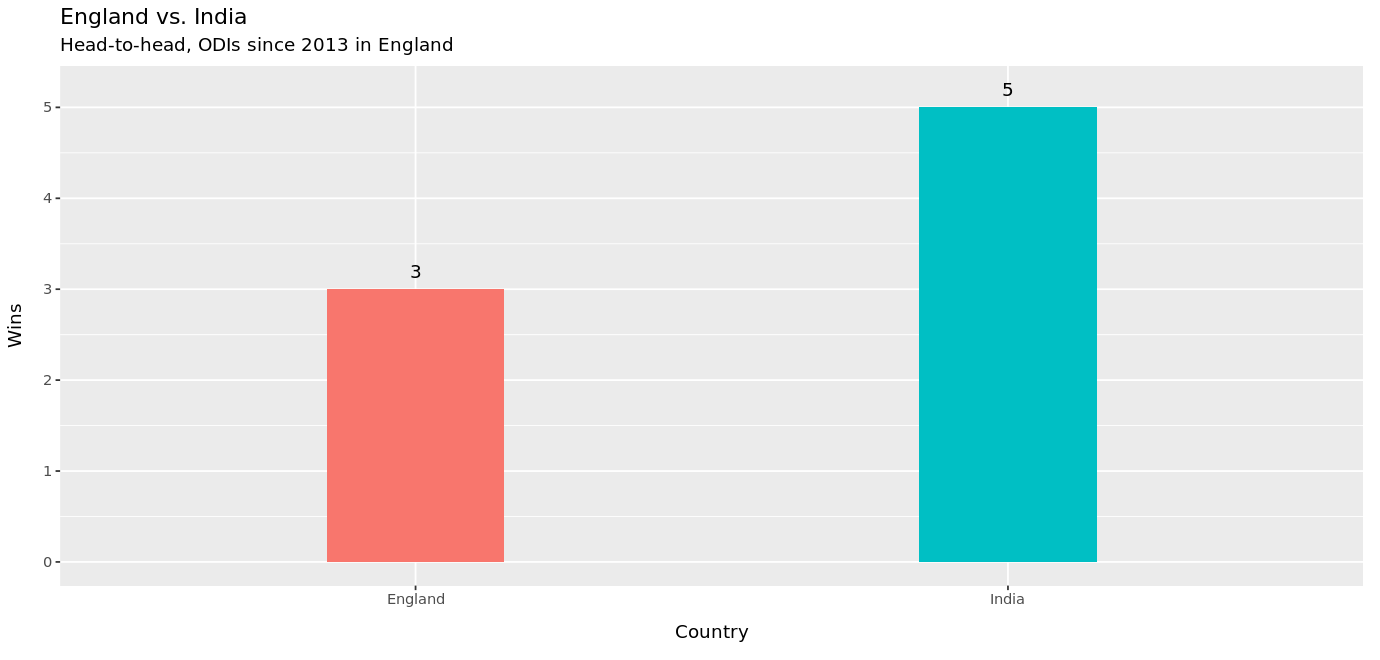

In [23]:
head_to_head('England', 'India')

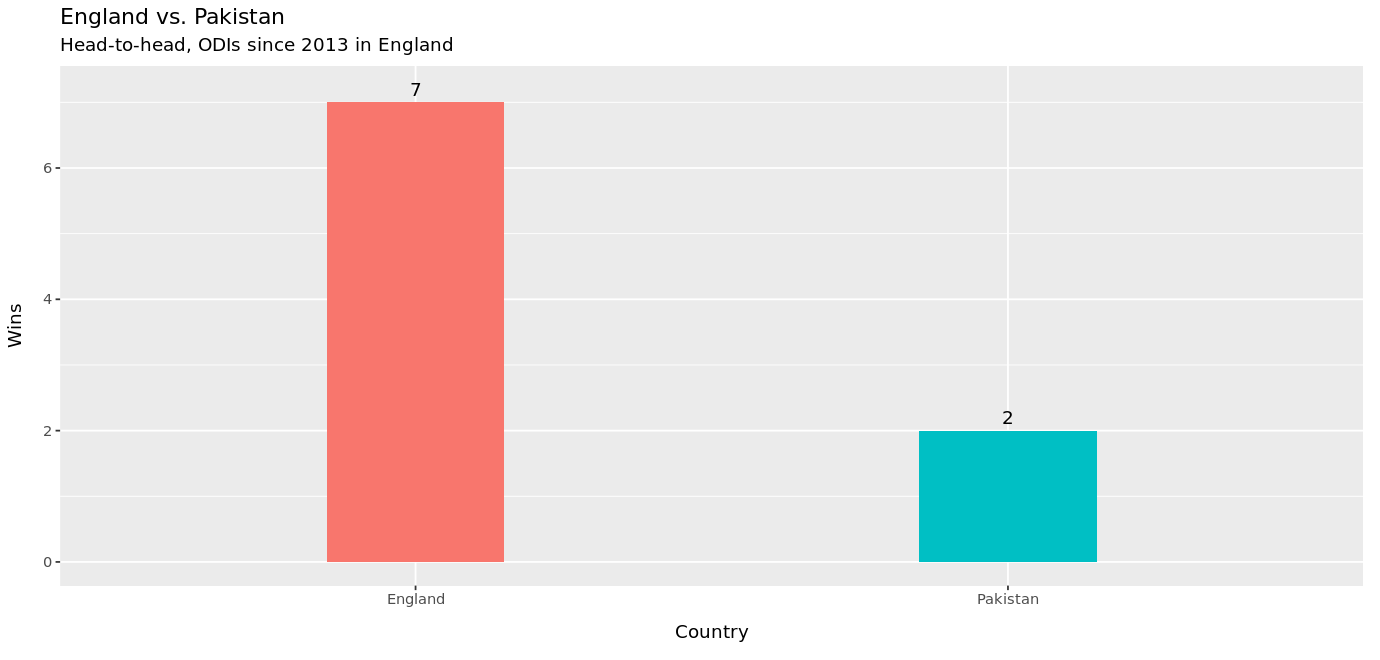

In [24]:
head_to_head('England', 'Pakistan')

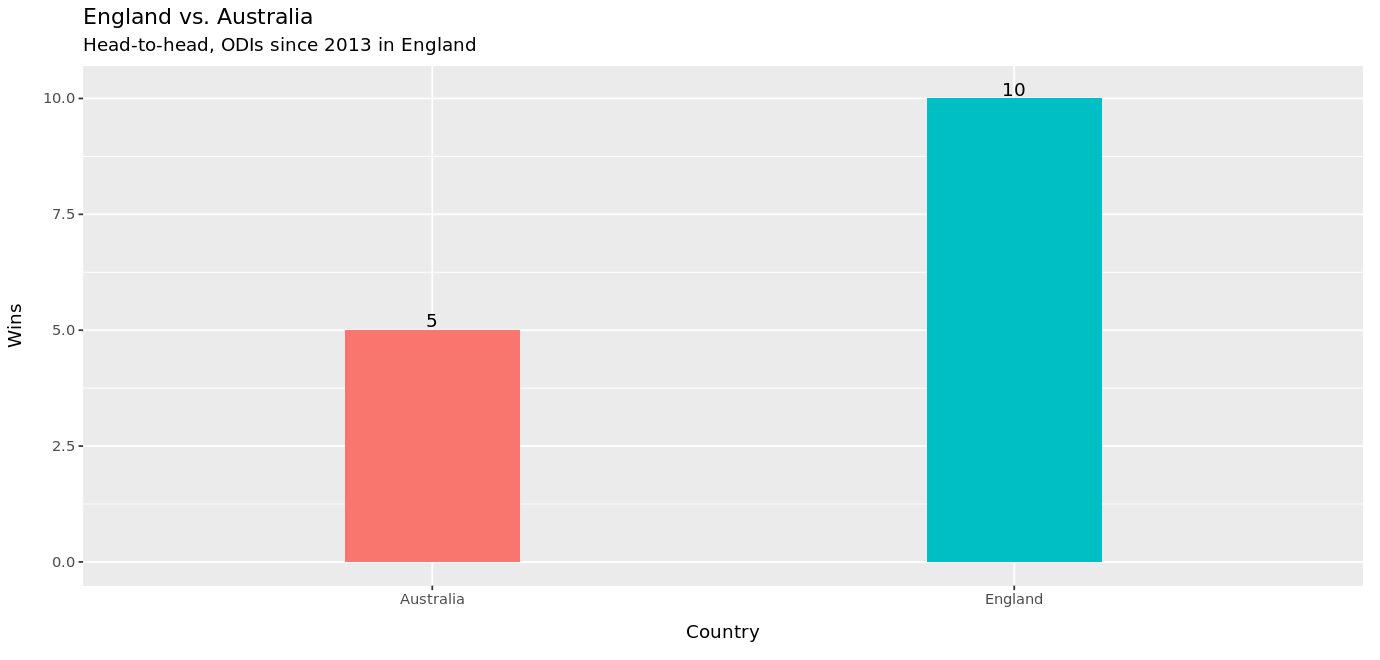

In [25]:
head_to_head('England', 'Australia')

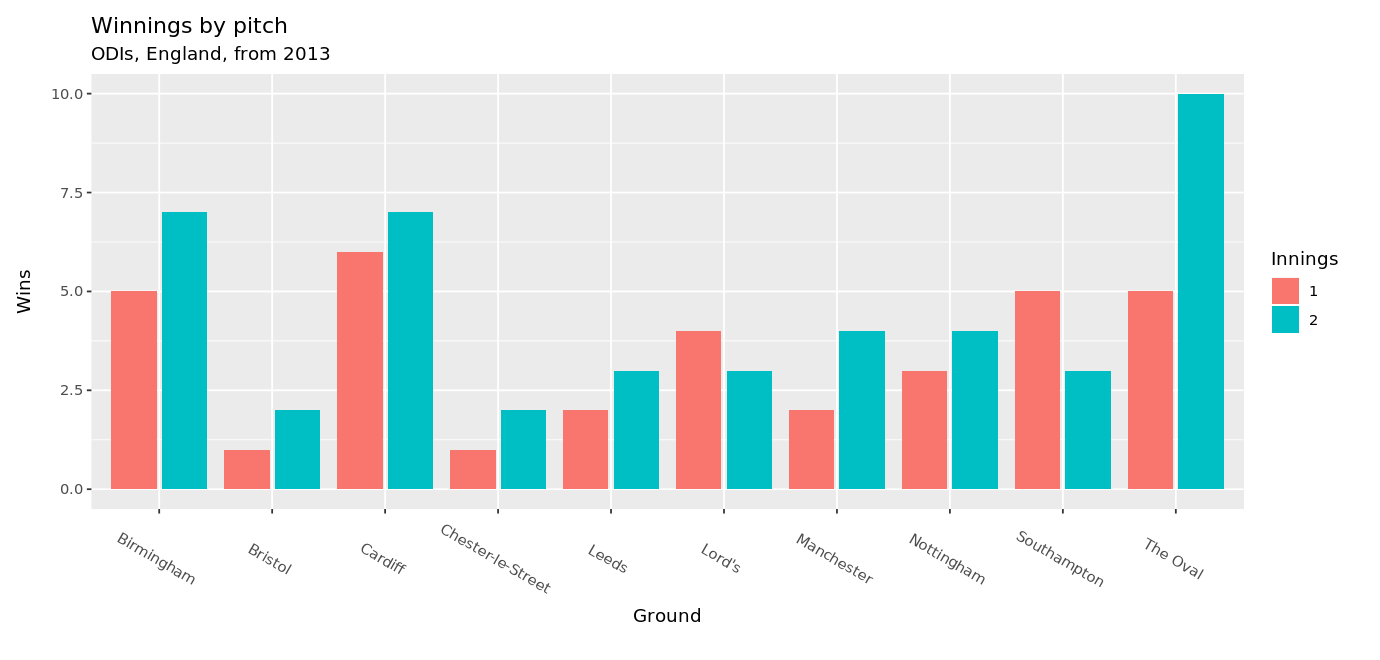

In [27]:
inn_by_pitch <- wc_prev_matches %>% group_by(Ground, Inns, Result) %>% count() %>% filter(Inns != 0, Result=='won')

ggplot(inn_by_pitch, aes(x=Ground, y=n, fill=as.factor(Inns))) + geom_bar(stat='identity', position = position_dodge2(width=0.5, preserve = 'single')) +
    labs(x='Ground', y='Wins', fill='Innings', title='Winnings by pitch', subtitle='ODIs, England, from 2013') +
    theme(plot.margin = margin(10, 20, 20, 10), axis.title.y = element_text(size=11, margin = margin(0,10,0,0)), axis.title.x = element_text(size=11, margin = margin(10,0,0,0)), 
          axis.text.x = element_text(angle = -30))

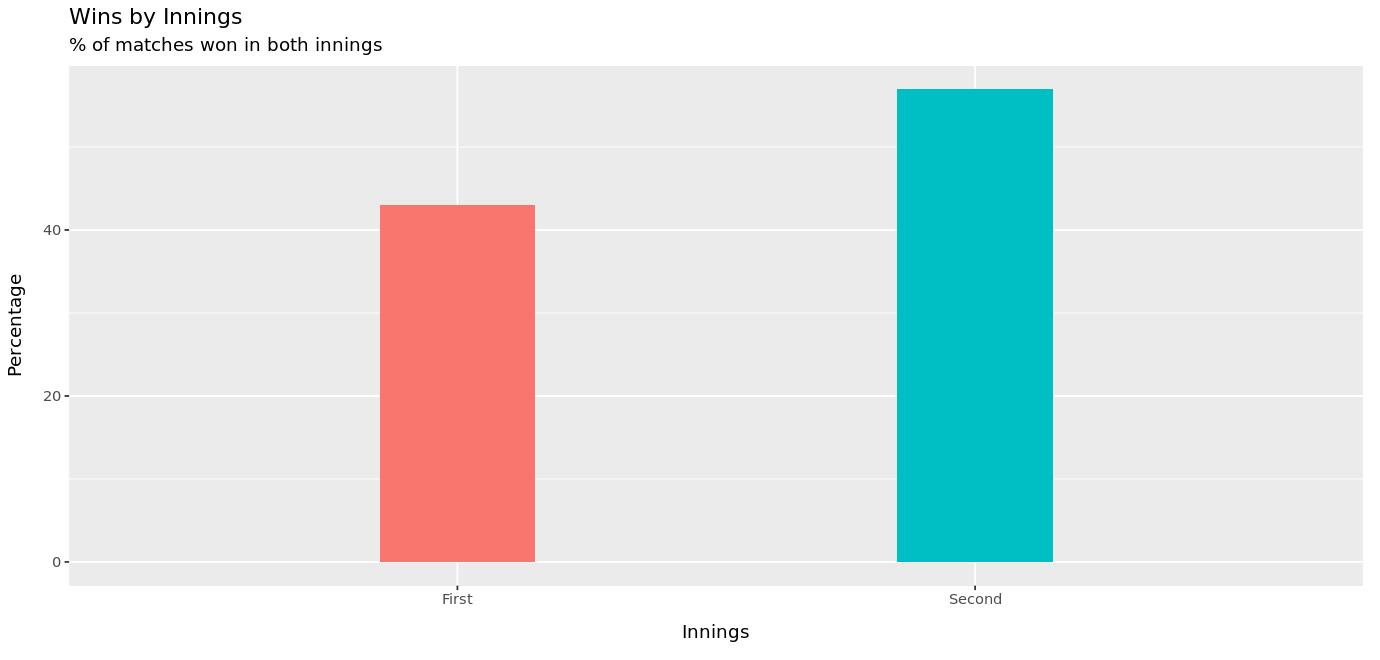

In [26]:
win_by_inn <- wc_prev_matches %>% group_by(Inns, Result) %>% count() %>% filter(Result == 'won')
win_by_inn <- win_by_inn %>% mutate(perc = n/sum(win_by_inn$n) * 100)

ggplot(win_by_inn, aes(x=Inns, y=perc, fill=as.factor(Inns))) + geom_bar(width=0.3, stat='identity') + 
    guides(fill=FALSE) +
    scale_x_discrete(limits=c(1,2), labels=c('1'='First', '2'='Second')) + 
    labs(x='Innings', y='Percentage', title='Wins by Innings', subtitle='% of matches won in both innings') +
    theme(plot.margin = margin(5, 10, 10, 5), axis.title.y = element_text(size=11, margin = margin(0,10,0,0)), axis.title.x = element_text(size=11, margin = margin(10,0,0,0)))


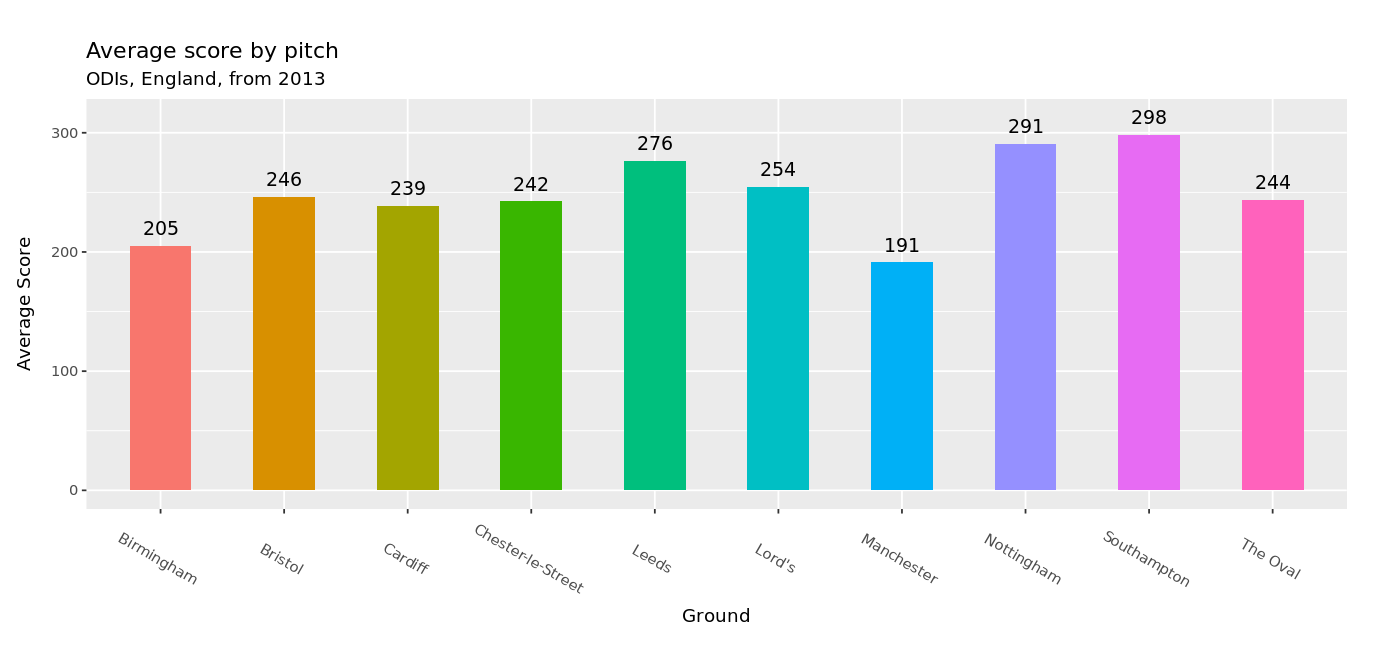

In [28]:
scores_by_stadium <- wc_prev_matches %>% filter(Score != 'DNB') %>% group_by(Ground) %>% summarise(mean = mean(as.numeric(Score)))

ggplot(scores_by_stadium, aes(x=Ground, fill=Ground, y=mean, label=sprintf("%.0f", mean))) + geom_bar(width=0.5, stat='identity') + geom_text(nudge_y=15, size=4) + 
    guides(fill=FALSE)+
    labs(x='Ground', y='Average Score', title='Average score by pitch', subtitle='ODIs, England, from 2013') +
    theme(plot.margin = margin(25, 20, 20, 10), axis.title.y = element_text(size=11, margin = margin(0,10,0,0)), axis.title.x = element_text(size=11, margin = margin(10,0,0,0)), 
          axis.text.x = element_text(angle = -30))

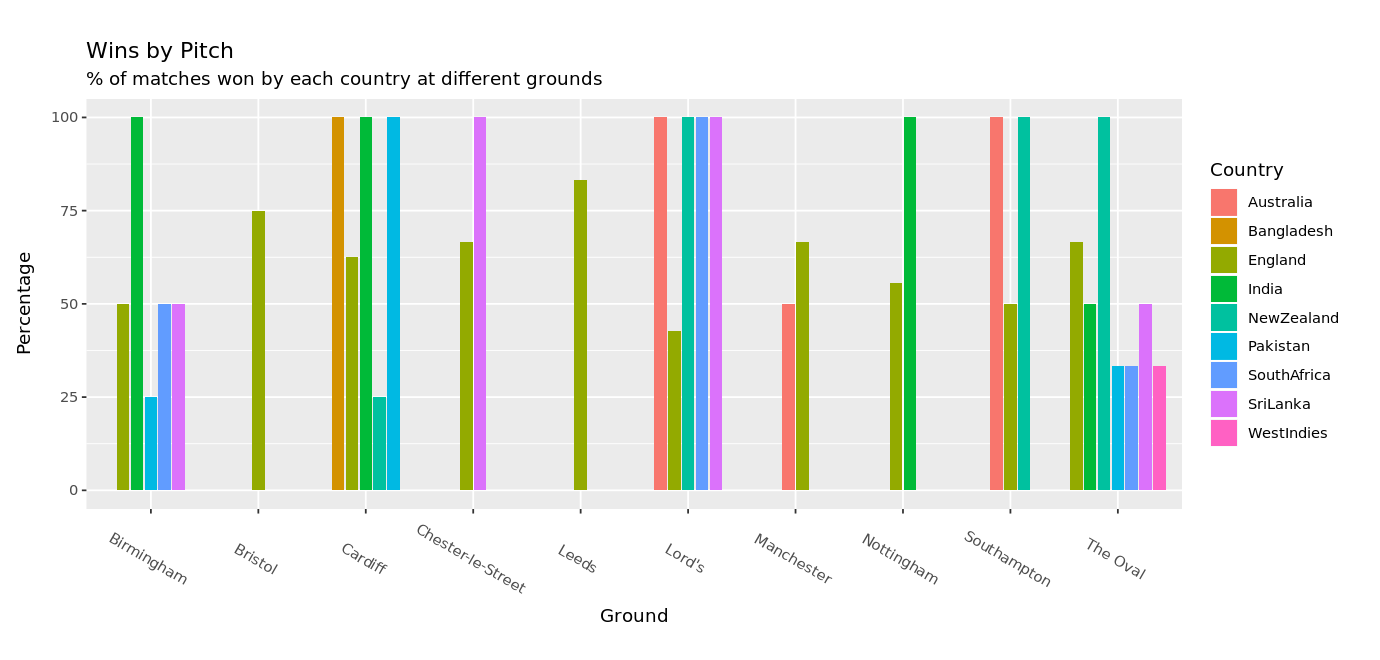

In [29]:
win_by_stadium <- wc_prev_matches %>% group_by(Ground, Country) %>% count()

win_by_stadium <- win_by_stadium %>% inner_join(wc_prev_matches %>% filter(Result == 'won') %>% group_by(Ground, Country) %>% count(), by=c('Ground', 'Country'), name=c('total', 'wins')) %>%
    rename('Total' = 'n.x', 'Wins' = 'n.y') %>% mutate(perc = Wins/Total * 100)

ggplot(win_by_stadium, aes(x=Ground, y=perc, fill=Country, label=sprintf('%.2f', perc))) + geom_bar(position = position_dodge2(width=0.5, preserve = 'single'), stat='identity') +
    labs(x='Ground', y='Percentage', fill='Country', title='Wins by Pitch', subtitle='% of matches won by each country at different grounds') +
    theme(plot.margin = margin(25, 20, 20, 10), axis.title.y = element_text(size=11, margin = margin(0,10,0,0)), axis.title.x = element_text(size=11, margin = margin(10,0,0,0)), 
          axis.text.x = element_text(angle = -30), legend.position='right')

In [30]:
batsman <- read.csv('Batsman_Data.csv') 

In [31]:
batsman %>% inner_join(players, by=c('Batsman' = 'Player', 'Player_ID' = 'ID'))

Warning message:
“Column `Batsman`/`Player` joining factor and character vector, coercing into character vector”

X,Bat1,Runs,BF,SR,X4s,X6s,Opposition,Ground,Start.Date,Match_ID,Batsman,Player_ID,Country,PlayerName
<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>,<int>,<fct>,<fct>
82,DNB,-,-,-,-,-,v India,Guwahati,21 Oct 2018,ODI # 4056,Oshane Thomas,914567,WestIndies,Oshane Thomas
83,0,0,2,0.00,0,0,v India,Thiruvananthapuram,1 Nov 2018,ODI # 4064,Oshane Thomas,914567,WestIndies,Oshane Thomas
84,0*,0,2,0.00,0,0,v Bangladesh,Dhaka,9 Dec 2018,ODI # 4071,Oshane Thomas,914567,WestIndies,Oshane Thomas
85,DNB,-,-,-,-,-,v Bangladesh,Dhaka,11 Dec 2018,ODI # 4072,Oshane Thomas,914567,WestIndies,Oshane Thomas
86,DNB,-,-,-,-,-,v England,Bridgetown,20 Feb 2019,ODI # 4096,Oshane Thomas,914567,WestIndies,Oshane Thomas
87,DNB,-,-,-,-,-,v England,Bridgetown,22 Feb 2019,ODI # 4097,Oshane Thomas,914567,WestIndies,Oshane Thomas
88,TDNB,-,-,-,-,-,v England,St George's,25 Feb 2019,ODI # 4098,Oshane Thomas,914567,WestIndies,Oshane Thomas
89,0,0,1,0.00,0,0,v England,St George's,27 Feb 2019,ODI # 4099,Oshane Thomas,914567,WestIndies,Oshane Thomas
90,DNB,-,-,-,-,-,v England,Gros Islet,2 Mar 2019,ODI # 4103,Oshane Thomas,914567,WestIndies,Oshane Thomas


In [32]:
head(batsman,n=10)

X,Bat1,Runs,BF,SR,X4s,X6s,Opposition,Ground,Start.Date,Match_ID,Batsman,Player_ID
<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
1,DNB,-,-,-,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Oshane Thomas,49619
2,DNB,-,-,-,-,-,v India,Kolkata,24 Dec 2009,ODI # 2935,Oshane Thomas,49619
3,DNB,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Oshane Thomas,49619
4,DNB,-,-,-,-,-,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Oshane Thomas,49619
5,DNB,-,-,-,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Oshane Thomas,49619
6,0*,0,8,0.00,0,0,v India,Dhaka,10 Jan 2010,ODI # 2941,Oshane Thomas,49619
7,0*,0,0,-,0,0,v England,The Oval,28 Jun 2011,ODI # 3165,Oshane Thomas,49619
8,DNB,-,-,-,-,-,v England,Leeds,1 Jul 2011,ODI # 3167,Oshane Thomas,49619
9,DNB,-,-,-,-,-,v England,Lord's,3 Jul 2011,ODI # 3168,Oshane Thomas,49619


In [35]:
england_batting <- batsman %>%
    filter(Bat1 != 'DNB', Bat1 != 'TDNB', SR != '-') %>%
    filter(Ground != 'East London') %>% filter(str_detect(Ground, paste(str_trim(wc_ground_names$Ground), collapse='|'))) %>%
    mutate_at(c('Runs', 'BF', 'X4s', 'X6s'), as.integer) %>% mutate(SR = as.double(SR), `Start.Date` = lubridate::dmy(`Start.Date`)) %>%
    mutate(out_or_not = ifelse(str_detect(string = Bat1, pattern = '\\*'), 0, 1))

In [68]:
batsman_performance <- function(player) { 
    
    d <- england_batting %>% filter(Batsman == player) %>% mutate(out_or_not = as.character(out_or_not))
    ggplot(d, aes(x=Ground)) + 
    geom_bar(aes(y=Runs, fill=out_or_not), stat='identity', position = position_dodge2(preserve = 'single')) +
    labs(x='Ground', y='Runs', fill='', title=paste('Runs scored by', player), subtitle='In England, from 2013') +
    theme(plot.margin = margin(10, 20, 20, 10), axis.title.y = element_text(size=11, margin = margin(0,10,0,0)), axis.title.x = element_text(size=11, margin = margin(10,0,0,0)), 
          axis.text.x = element_text(angle = -30))
}

In [45]:
batsman_avgs <- england_batting %>% group_by(Batsman) %>%
    summarise_at(c('Runs', 'BF', 'X4s', 'X6s', 'out_or_not'), sum) %>%
    mutate(bat_avg = Runs/out_or_not, str_rate = Runs/BF * 100) %>% 
    filter(out_or_not > 0) %>% # Filtering players
    inner_join(players, by=c("Batsman" = "Player"))

Warning message:
“Column `Batsman`/`Player` joining factor and character vector, coercing into character vector”

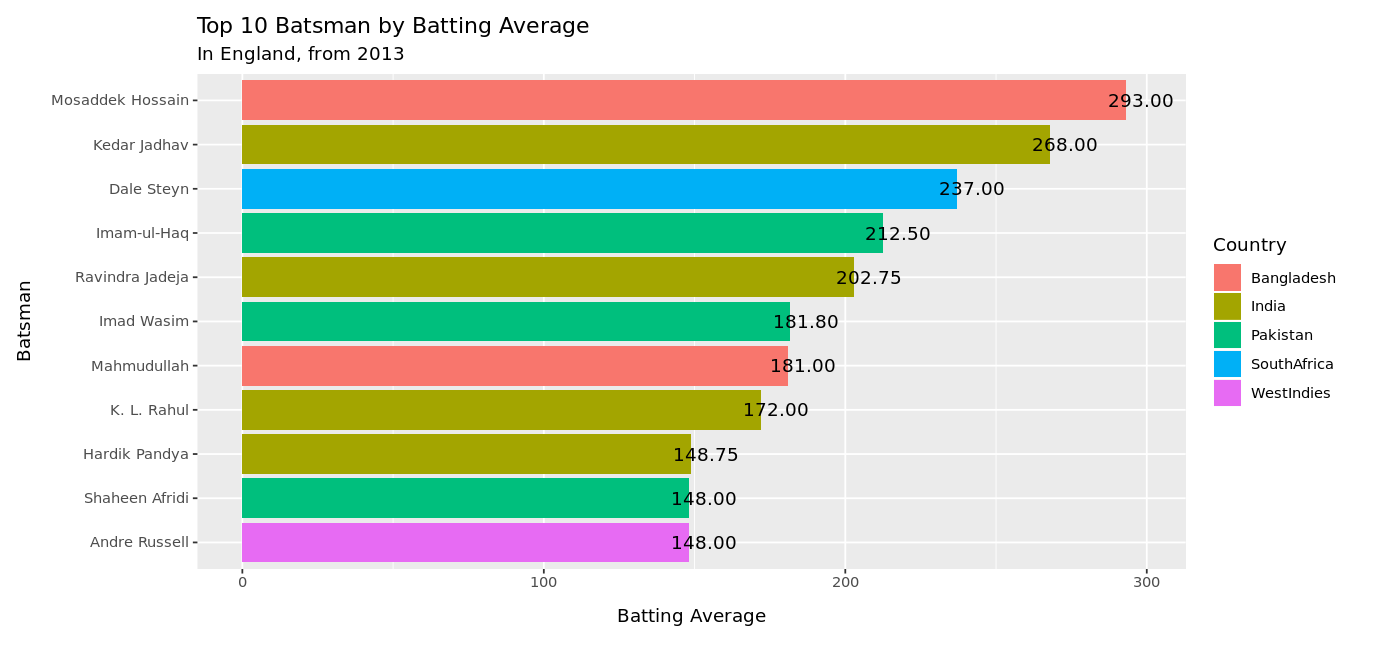

In [46]:
ggplot(top_n(batsman_avgs, 10, bat_avg), aes(x=reorder(Batsman, bat_avg), y=bat_avg, fill=Country, label=sprintf('%.2f', bat_avg))) + geom_bar(stat='identity') + coord_flip() +
    geom_text(nudge_y = 5) +
    labs(y='Batting Average', x='Batsman', title='Top 10 Batsman by Batting Average', subtitle='In England, from 2013') + 
    theme(plot.margin = margin(10, 20, 20, 10), axis.title.y = element_text(size=11, margin = margin(0,10,0,0)), axis.title.x = element_text(size=11, margin = margin(10,0,0,0)),
             legend.position='right')

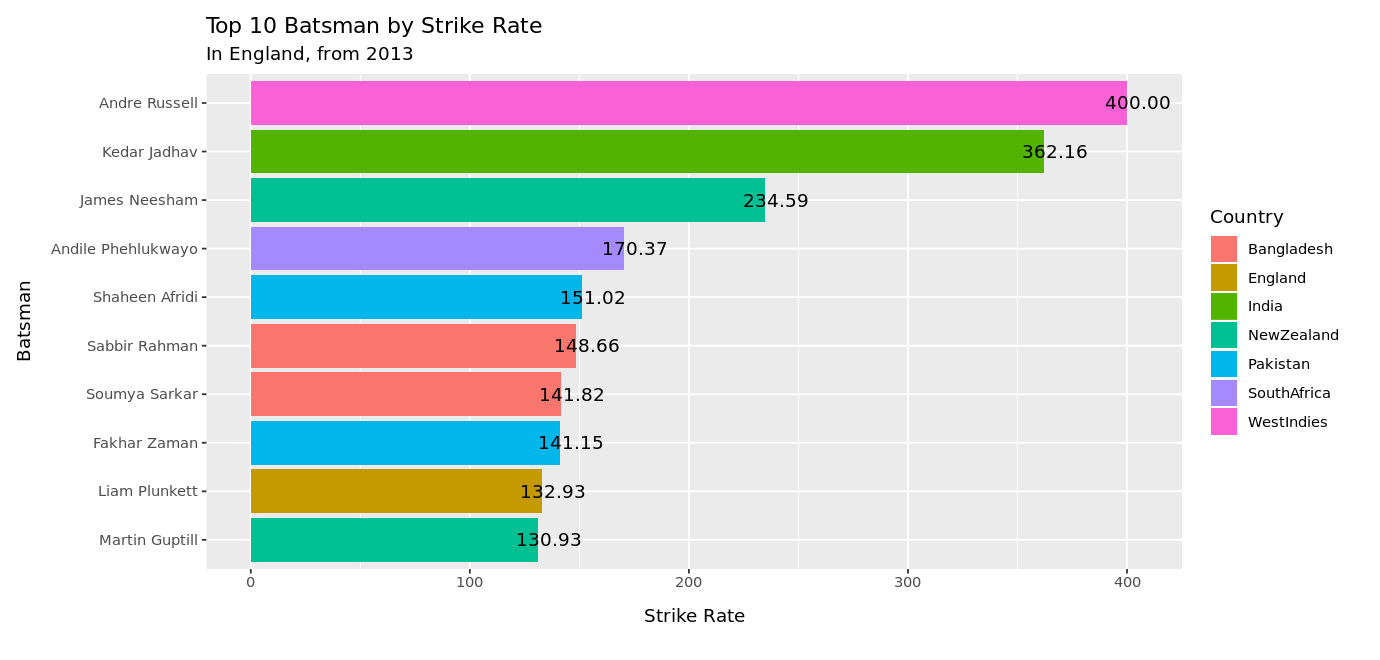

In [47]:
ggplot(top_n(batsman_avgs %>% filter(bat_avg >= 40), 10, str_rate), aes(x=reorder(Batsman, str_rate), y=str_rate, fill=Country, label=sprintf('%.2f', str_rate))) + 
    geom_bar(stat='identity') + coord_flip() +
    geom_text(nudge_y = 5) +
    labs(y='Strike Rate', x='Batsman', title='Top 10 Batsman by Strike Rate', subtitle='In England, from 2013') + 
    theme(plot.margin = margin(10, 20, 20, 10), axis.title.y = element_text(size=11, margin = margin(0,10,0,0)), axis.title.x = element_text(size=11, margin = margin(10,0,0,0)),
             legend.position='right')


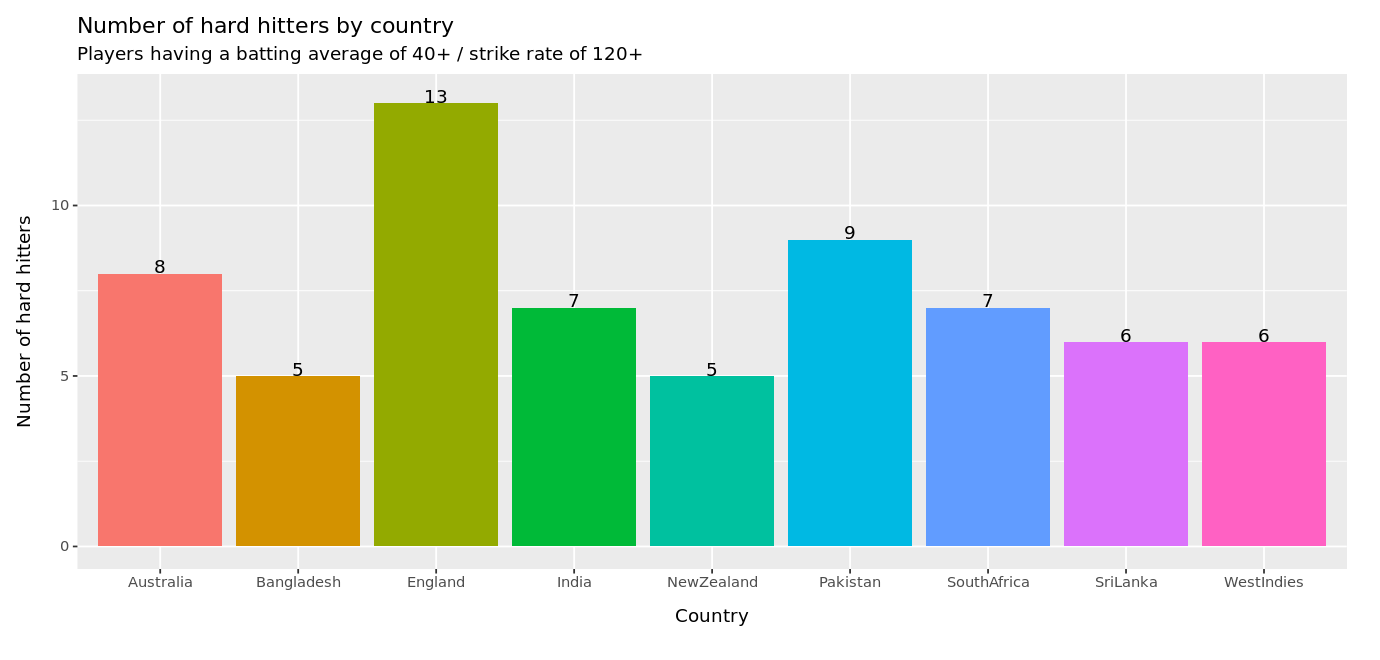

In [48]:
high_bat_country <- batsman_avgs %>% group_by(Country) %>% filter(bat_avg >= 40 | str_rate >= 120)
ggplot(high_bat_country %>% count(), aes(x=Country, y=n, fill=Country, label=n)) + geom_bar(stat='identity') + geom_text(nudge_y = 0.2) + 
    labs(x='Country', y='Number of hard hitters', title='Number of hard hitters by country', subtitle='Players having a batting average of 40+ / strike rate of 120+') +
    guides(fill=FALSE) +
    theme(plot.margin = margin(10, 20, 20, 10), axis.title.y = element_text(size=11, margin = margin(0,10,0,0)), axis.title.x = element_text(size=11, margin = margin(10,0,0,0)))

In [49]:
bowler <- read.csv('Bowler_data.csv')

In [51]:
overs_to_balls <- function(overs){
    split = as.integer(str_split(overs, '\\.')[[1]])
    return(split[1] * 6 + split[2])
}

england_bowling <- bowler %>%
    filter(Overs != '-') %>%
    filter(Ground != 'East London') %>% 
    filter(str_detect(Ground, paste(str_trim(wc_ground_names$Ground), collapse='|'))) %>% 
    rowwise() %>%
    mutate(Balls = overs_to_balls(Overs)) %>%
    mutate_at(c('Mdns', 'Runs', 'Wkts'), as.integer) %>%
    mutate(Econ = as.double(Econ), Ave = as.double(str_replace(Ave, '-', '0')), SR = as.double(str_replace(SR, '-', '0')), `Start.Date` = lubridate::dmy(`Start.Date`)) %>%
    ungroup()

head(england_bowling)

X,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start.Date,Match_ID,Bowler,Player_ID,Balls
<int>,<fct>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<date>,<fct>,<fct>,<int>,<dbl>
7,7.0,2,55,4,430,26.00,21.0,v England,The Oval,2011-06-28,ODI # 3165,Suranga Lakmal,49619,42
8,7.5,2,45,5,316,14.33,15.6,v England,Leeds,2011-07-01,ODI # 3167,Suranga Lakmal,49619,47
9,10.0,2,66,4,358,31.00,30.0,v England,Lord's,2011-07-03,ODI # 3168,Suranga Lakmal,49619,60
10,2.0,2,11,2,350,0.00,0.0,v England,Nottingham,2011-07-06,ODI # 3169,Suranga Lakmal,49619,12
27,6.0,2,35,2,329,0.00,0.0,v England,The Oval,2014-05-22,ODI # 3492,Suranga Lakmal,49619,36
44,10.0,2,69,4,376,32.50,30.0,v England,Nottingham,2016-06-21,ODI # 3751,Suranga Lakmal,49619,60


In [52]:
bowler_plot <- function(player) {
        bowler <- england_bowling %>% filter(Bowler == player)
        ggplot(bowler, aes(x=Ground, y=Econ, label=sprintf('%.2f', Econ), fill=as.factor(year(`Start Date`)))) + 
        geom_bar(stat='identity', position = position_dodge2(width=1.5, preserve = 'single')) +
        geom_text(position = position_dodge2(width=1, preserve = 'single'), vjust=-.3, size=3) +
        theme_economist() +
        scale_fill_ptol() +
        labs(x='Ground', y='Economy Rate', fill='Year', title=paste("Economy Rate of", player), subtitle='In England, from 2013') +
        theme(plot.margin = margin(10, 20, 20, 10), axis.title.y = element_text(size=11, margin = margin(0,10,0,0)), axis.title.x = element_text(size=11, margin = margin(10,0,0,0)))       
}


In [53]:
overall_bowler <- england_bowling %>% 
    group_by(Bowler) %>% 
    summarise(runs = sum(Runs), mdns = sum(Mdns), wkts = sum(Wkts), balls = sum(Balls)) %>%
    filter(balls >= 60, wkts > 0) %>% # Filtering constant bowlers
    mutate(econ = runs*6/balls, avg = runs/wkts, sr=balls/wkts) %>%
    left_join(players, by=c('Bowler' = 'Player')) %>% select(-ID, -PlayerName)

head(overall_bowler)

Warning message:
“Column `Bowler`/`Player` joining factor and character vector, coercing into character vector”

Bowler,runs,mdns,wkts,balls,econ,avg,sr,Country
<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Adam Zampa,67,5,6,74,5.432432,11.16667,12.33333,Australia
Adil Rashid,2363,91,160,2382,5.952141,14.76875,14.88750,England
Andile Phehlukwayo,166,7,9,144,6.916667,18.44444,16.00000,SouthAfrica
Angelo Mathews,426,27,34,306,8.352941,12.52941,9.00000,SriLanka
Ashley Nurse,211,8,9,167,7.580838,23.44444,18.55556,WestIndies
Ben Stokes,1325,67,96,1189,6.686291,13.80208,12.38542,England


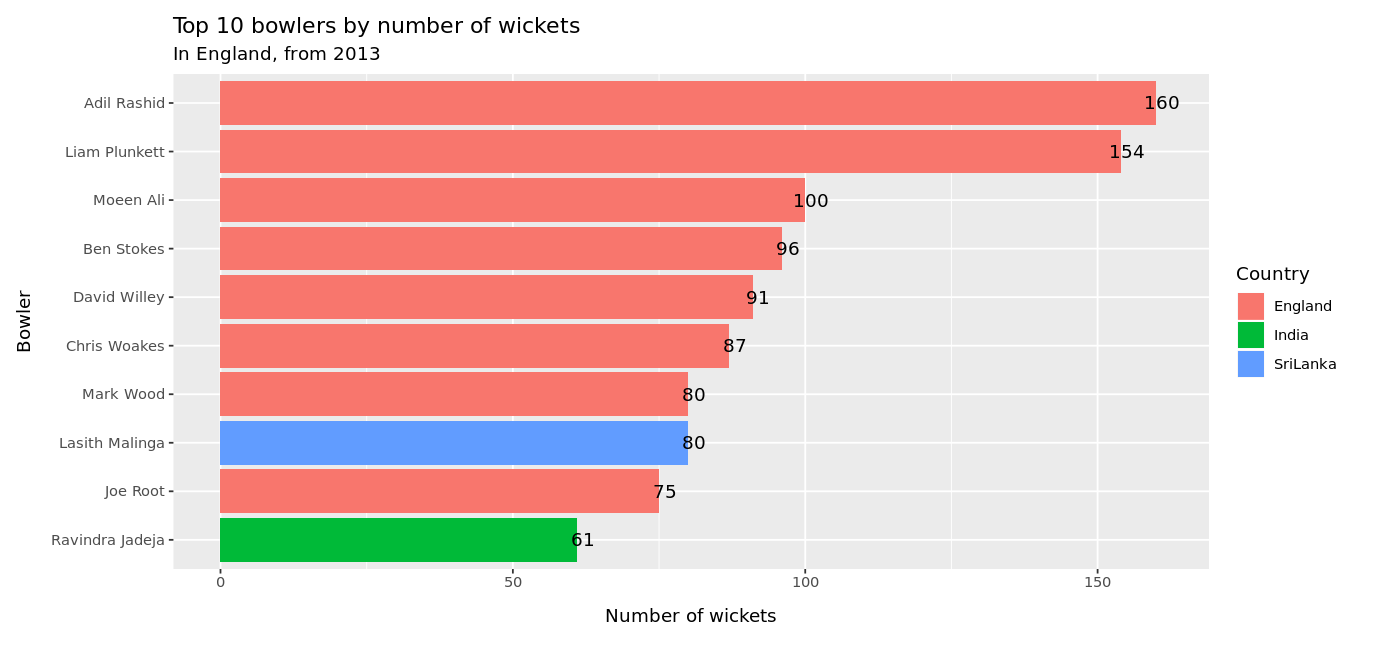

In [60]:
ggplot(top_n(overall_bowler, 10, wkts), aes(x=reorder(Bowler, wkts), y=wkts, fill=Country, label=wkts)) + 
    geom_bar(stat='identity') +
    coord_flip() +
    geom_text(nudge_y = 1) +  
    labs(x='Bowler', y='Number of wickets', title='Top 10 bowlers by number of wickets', subtitle='In England, from 2013') +
    theme(plot.margin = margin(10, 20, 20, 10), axis.title.y = element_text(size=11, margin = margin(0,10,0,0)), axis.title.x = element_text(size=11, margin = margin(10,0,0,0)),
          legend.position='right')

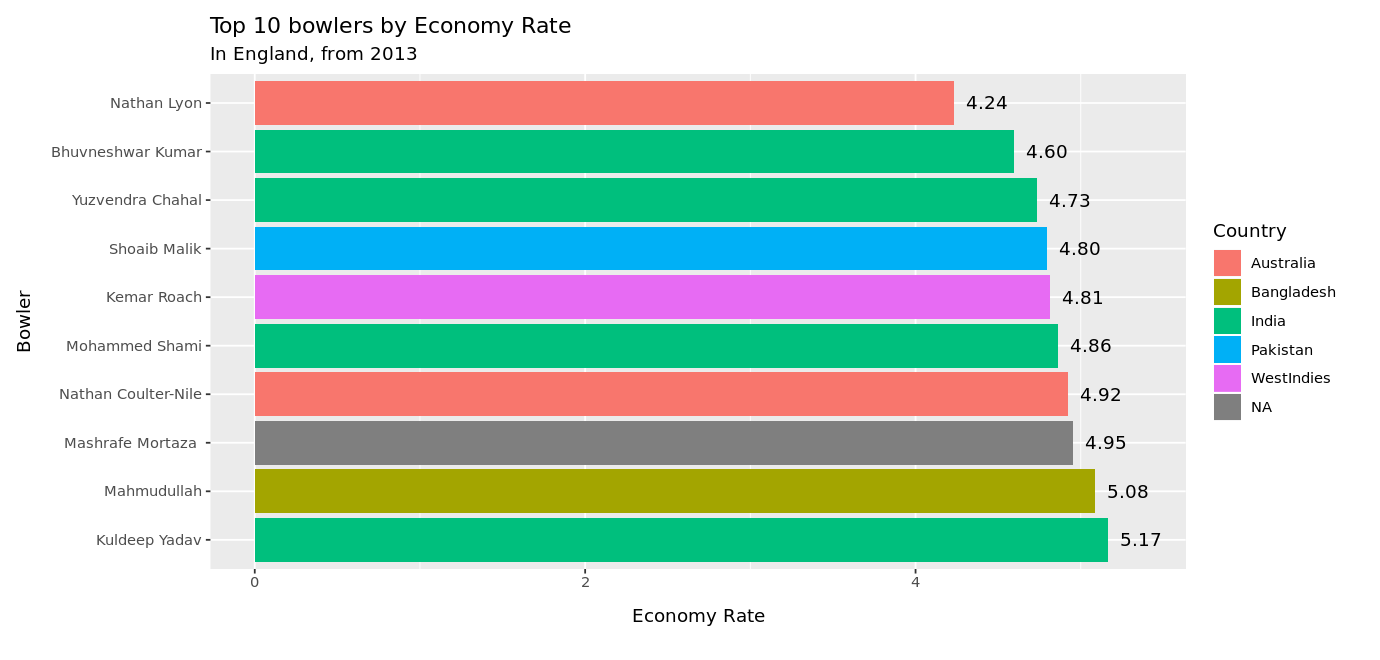

In [54]:
ggplot(top_n(overall_bowler, 10, -econ), aes(x=reorder(Bowler, -econ), y=econ, fill=Country, label=sprintf("%.2f", econ))) + 
    geom_bar(stat='identity') + 
    coord_flip() +
    geom_text(nudge_y = .2) + 
    labs(x='Bowler', y='Economy Rate', title='Top 10 bowlers by Economy Rate', subtitle='In England, from 2013') +
    theme(plot.margin = margin(10, 20, 20, 10), axis.title.y = element_text(size=11, margin = margin(0,10,0,0)), axis.title.x = element_text(size=11, margin = margin(10,0,0,0)), 
        legend.position='right')

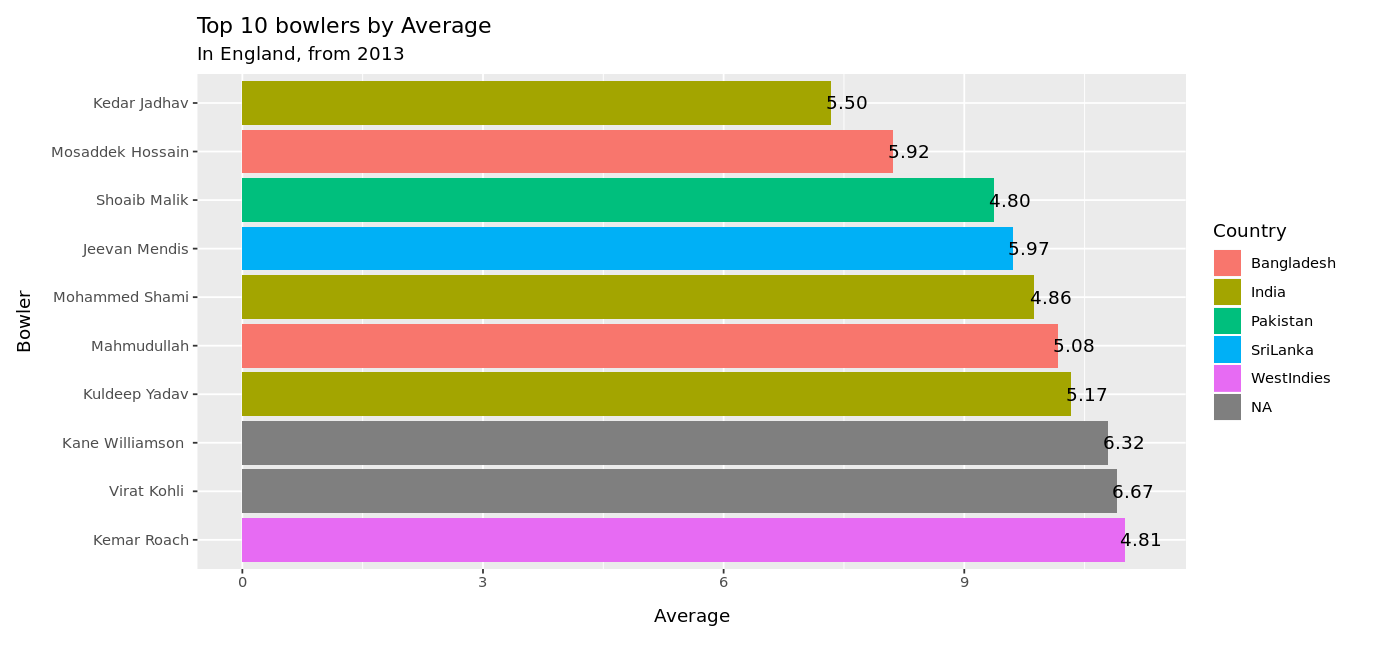

In [56]:
ggplot(top_n(overall_bowler, 10, -avg), aes(x=reorder(Bowler, -avg), y=avg, fill=Country, label=sprintf("%.2f", econ))) + 
    geom_bar(stat='identity') +
    coord_flip() +
    geom_text(nudge_y = .2) + 
    labs(x='Bowler', y='Average', title='Top 10 bowlers by Average', subtitle='In England, from 2013') +
    theme(plot.margin = margin(10, 20, 20, 10), axis.title.y = element_text(size=11, margin = margin(0,10,0,0)), axis.title.x = element_text(size=11, margin = margin(10,0,0,0)),
        legend.position='right')

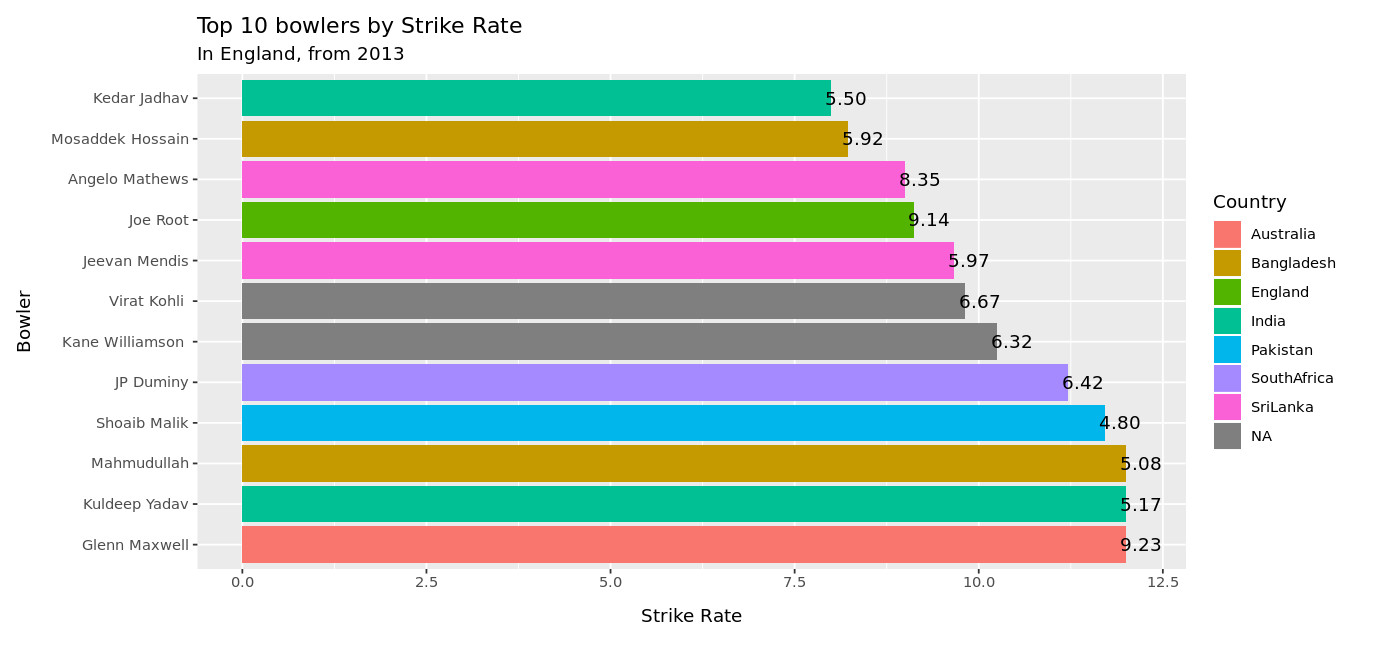

In [57]:
ggplot(top_n(overall_bowler, 10, -sr), aes(x=reorder(Bowler, -sr), y=sr, fill=Country, label=sprintf("%.2f", econ))) + 
    geom_bar(stat='identity') + 
    coord_flip() +
    geom_text(nudge_y = .2) + 
    labs(x='Bowler', y='Strike Rate', title='Top 10 bowlers by Strike Rate', subtitle='In England, from 2013') +
    theme(plot.margin = margin(10, 20, 20, 10), axis.title.y = element_text(size=11, margin = margin(0,10,0,0)), axis.title.x = element_text(size=11, margin = margin(10,0,0,0)),
          legend.position='right')

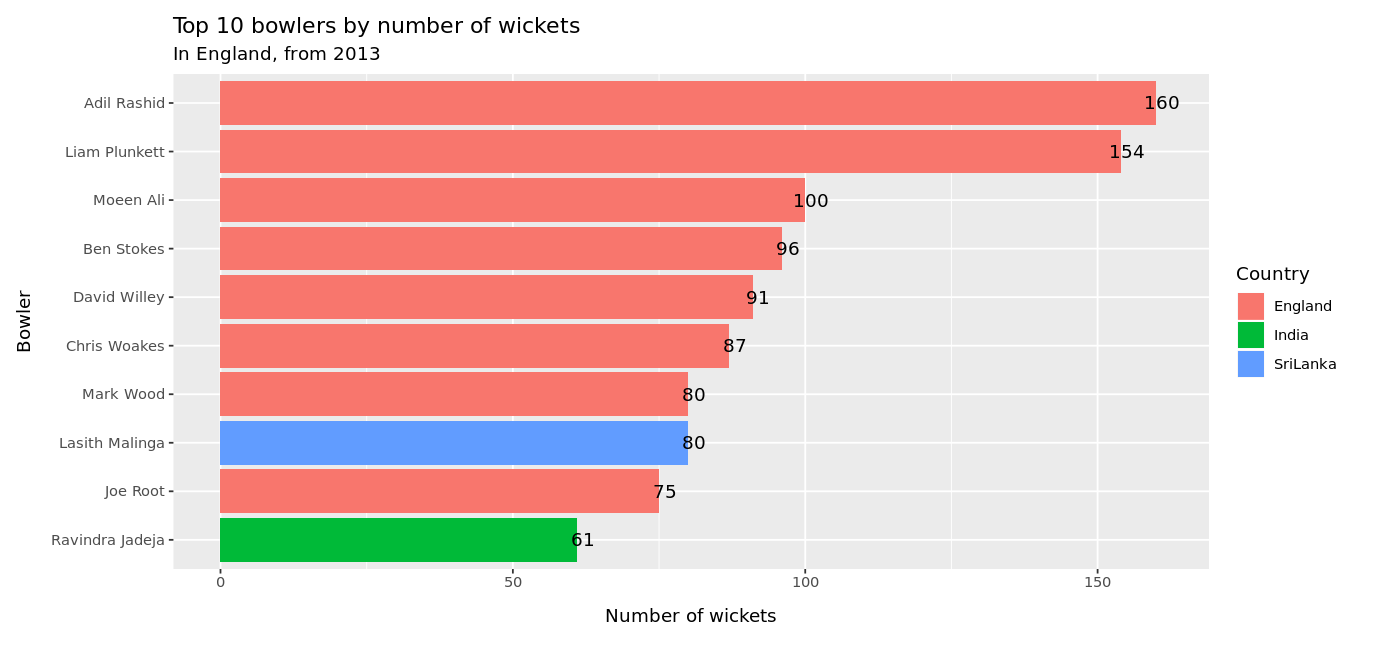

In [59]:
ggplot(top_n(overall_bowler, 10, wkts), aes(x=reorder(Bowler, wkts), y=wkts, fill=Country, label=wkts)) + 
    geom_bar(stat='identity') +
    coord_flip() +
    geom_text(nudge_y = 1) + 
    labs(x='Bowler', y='Number of wickets', title='Top 10 bowlers by number of wickets', subtitle='In England, from 2013') +
    theme(plot.margin = margin(10, 20, 20, 10), axis.title.y = element_text(size=11, margin = margin(0,10,0,0)), axis.title.x = element_text(size=11, margin = margin(10,0,0,0)),
          legend.position='right')

Warning message:
“Factor `Country` contains implicit NA, consider using `forcats::fct_explicit_na`”Warning message:
“Factor `Country` contains implicit NA, consider using `forcats::fct_explicit_na`”

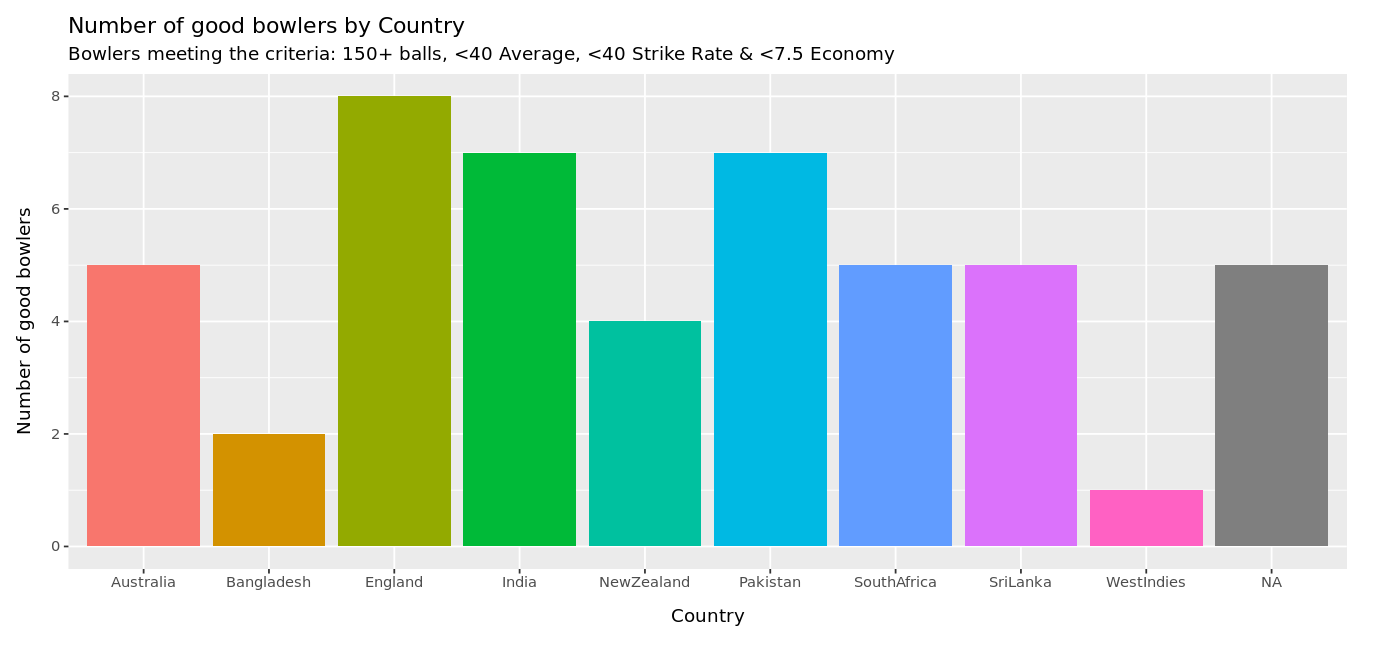

In [61]:
country_bowler <- overall_bowler %>% group_by(Country) %>% filter(balls > 150, avg < 40, sr < 40, econ < 8) %>% count()

ggplot(country_bowler, aes(x=Country, y=n, fill=Country)) + geom_bar(stat='identity') +
    guides(fill=FALSE) + 
    labs(x='Country', 
         y='Number of good bowlers', 
         title='Number of good bowlers by Country', 
         subtitle='Bowlers meeting the criteria: 150+ balls, <40 Average, <40 Strike Rate & <7.5 Economy') +
    theme(plot.margin = margin(10, 20, 20, 10), 
          axis.title.y = element_text(size=11, margin = margin(0,10,0,0)), 
          axis.title.x = element_text(size=11, margin = margin(10,0,0,0)))